$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

## Prisoner's Dilemma  (Quantum Walk model Code)

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer,assemble, transpile
from qiskit import BasicAer
from random import randrange
from qiskit.tools.visualization import plot_histogram, plot_state_city
import numpy as np
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import Operator, Statevector

We need six qubits. The qubits $q[0]$ and $q[1]$ are presenting each player's decision. We first consider a Hadamard coin which shows an equal probability for each coin state.

In [2]:
q = QuantumRegister(6)  # "Qubits q[0] and q[1] for coin 1 and 2", "q[2] and q[3] for player 1" and q[4] and q[5] for player 2" 
c = ClassicalRegister(6)
Q = QuantumCircuit(q,c)

#Coin Operators
# Apply u gate as Hadamard gate to each coin
Q.u(np.pi/2,0,np.pi,q[0])   
Q.u(np.pi/2,0,np.pi,q[1])

Initially, we suppose two players are in their $\ket{00}$ state. It means both of the prisons are considered free. We show the consequence of their decision to confess or be silent coming from coin space.

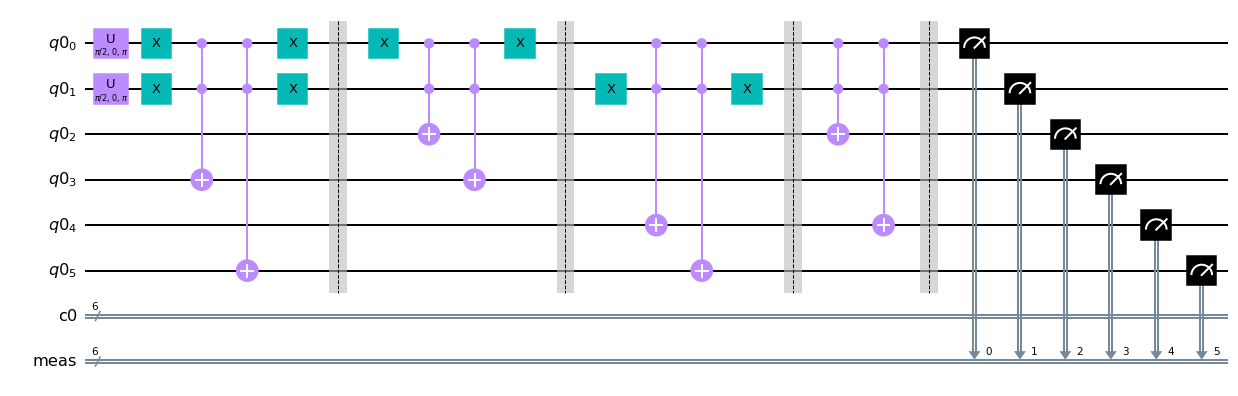

In [3]:
#S operator

Q.x(q[0])
Q.x(q[1])
Q.mct([q[0],q[1]],q[3])
Q.mct([q[0],q[1]],q[5])
Q.x(q[0])
Q.x(q[1])
Q.barrier()


Q.x(q[0])
Q.mct([q[0],q[1]],q[2])
Q.mct([q[0],q[1]],q[3])
Q.x(q[0])
Q.barrier()

Q.x(q[1])
Q.mct([q[0],q[1]],q[4])
Q.mct([q[0],q[1]],q[5])
Q.x(q[1])
Q.barrier()

Q.mct([q[0],q[1]],q[2])
Q.mct([q[0],q[1]],q[4])




Q.measure_all()

Q.draw(output='mpl')

Now we can measure each qubit.

{'110001 000000': 247, '101000 000000': 248, '001110 000000': 270, '010111 000000': 235}


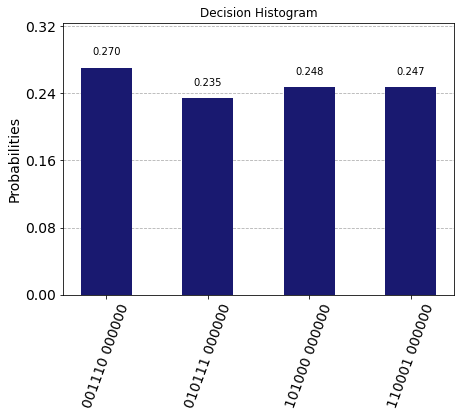

In [4]:
# Execute the circuit on the qasm simulator
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(Q, backend_sim, shots=1000)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(Q)
print(counts)
    


plot_histogram(counts, color='midnightblue', title="Decision Histogram")


According to the obtained results, players will face each consequence by equal probability. It is agreed with our expectation since we used the Hadamard coin.

According to the obtained results, players will face each consequence by equal probability. It is agreed with our expectation since we used the Hadamard coin.

In [5]:
q_o = QuantumRegister(6)  # "Qubits q[0] and q[1] for coin 1 and 2", "q[2] and q[3] for player 1" and q[4] and q[5] for player 2" 
c_o = ClassicalRegister(6)
Q_o = QuantumCircuit(q,c)

#Coin Operators
# Apply u gate as Hadamard gate to each coin
Q_o.u(2*np.pi/3,0,np.pi,q[0])   
Q_o.u(np.pi/2,0,np.pi,q[1])
#S operator

Q_o.x(q[0])
Q_o.x(q[1])
Q_o.mct([q[0],q[1]],q[3])
Q_o.mct([q[0],q[1]],q[5])
Q_o.x(q[0])
Q_o.x(q[1])
Q_o.barrier()


Q_o.x(q[0])
Q_o.mct([q[0],q[1]],q[2])
Q_o.mct([q[0],q[1]],q[3])
Q_o.x(q[0])
Q_o.barrier()

Q_o.x(q[1])
Q_o.mct([q[0],q[1]],q[4])
Q_o.mct([q[0],q[1]],q[5])
Q_o.x(q[1])
Q_o.barrier()

Q_o.mct([q[0],q[1]],q[2])
Q_o.mct([q[0],q[1]],q[4])




Q_o.measure_all()


{'010111 000000': 368, '101000 000000': 130, '110001 000000': 376, '001110 000000': 126}


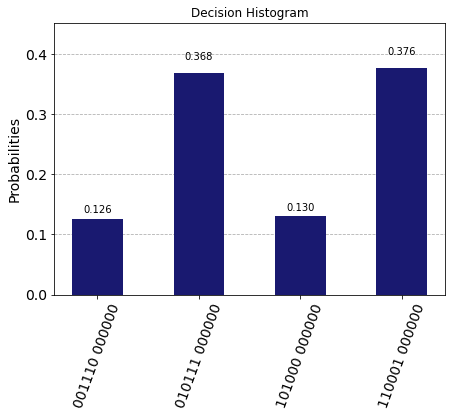

In [6]:
# Execute the circuit on the qasm simulator
# Use Aer's qasm_simulator
backend_sim_o = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim_o = execute(Q_o, backend_sim, shots=1000)

# Grab the results from the job.
result_sim_o = job_sim_o.result()
counts_o = result_sim_o.get_counts(Q_o)
print(counts_o)
    


plot_histogram(counts_o, color='midnightblue', title="Decision Histogram")

As we can see from the results, the pessimistic player (player 1) will be in a better situation. The probability of being free is about 36%, and with 40%, she/he will condemn for five year.

In conclusion, we showed a quantum computing circuit that could model the Prison's dilemma's game based on the quantum walk algorithm. For the following work, we can study the effect of each decision by changing the wights in the U-gate of coin space. Also, natural social experiments can compare the final results by increasing the number of players looking at group decision-making.

### More References
In Reference [[D07]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8156936/), Zhang and Busemeyer proposed a quantum walk model to study the propagation of ideas in a network and form agreement in group decision-making. The methodology is based on the use of control-U gates in quantum computing. 
In 2016, a model of the decision-maker presented as an open system in contact with her surrounding environment. They showed that implementing quantum coherence on classical networks may be a door to better integrate human-like reasoning biases in stochastic models for decision-making [[D08]](https://www.nature.com/articles/srep23812).